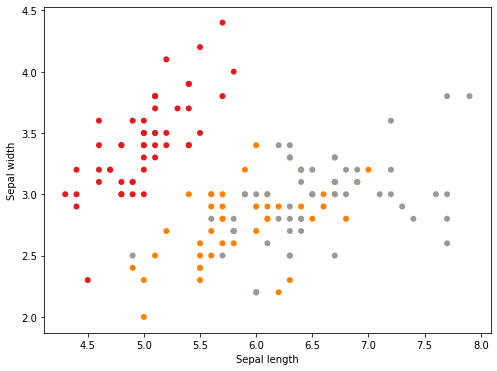

In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()

def plot_cluster(data, label) :
    X = data[:, :2]  # we only take the first two features.
    y = label

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    plt.figure(2, figsize=(8, 6))
    plt.clf()

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
                edgecolor='none')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.show()

plot_cluster(iris.data, iris.target)

In [63]:
display(iris.target)
len(iris.target)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

150

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

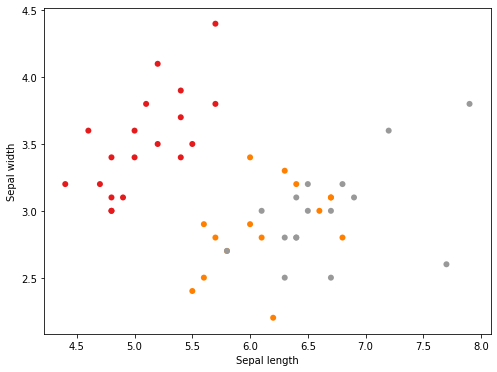

In [64]:
# split data
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)
display(y_test)
plot_cluster(X_test, y_test)

In [75]:
# using kmeans from sklearn for comparison
from sklearn.cluster import KMeans

kmeans_sklearn = KMeans(n_clusters=3, random_state=0).fit(X_train)
display(kmeans_sklearn.labels_)
print(calculate_accuracy(kmeans_sklearn.labels_, y_train))

cluster_label = kmeans_sklearn.predict(X_test)
cluster_label

array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0,
       1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2,
       2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 1, 2, 2, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2], dtype=int32)

0.87


array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 2], dtype=int32)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 1 0 2 2 2 2 2 0 0 0 0 1 0 0 1 1
 0 0 0 1 1 1 0 0 1 1 2 1 2]
0.9


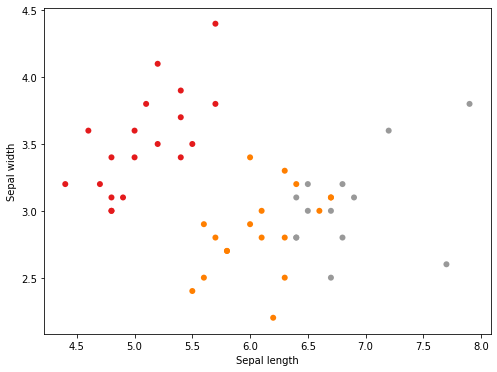

In [66]:
# X = iris.data[:, :2]  # we only take the first two features.
i = 0
count_false = 0
print(y_test)
print(cluster_label)
for x in y_test :
    if cluster_label[i] != x :
        count_false += 1
    i += 1

accuracy = (len(y_test) - count_false) / len(y_test)
print(accuracy)
    
plot_cluster(X_test, cluster_label)

In [69]:
import random
import math
import numpy as np

def generate_centroid(n_centroid, label, input_dataset) :
    cluster_data = []   
    
    for x in range(n_centroid) :
        cluster = []
        for i in range(len(label)) :
            if label[i] == x :
                cluster.append(input_dataset[i])
        cluster_data.append(cluster)
    
    centroid = []
    for i in range(n_centroid) :
        centroid.append(np.average(cluster_data[i], axis=0))
    
    return centroid

def generate_cluster(centroid, input_dataset) :
    euclidian_dist = []
    for data in input_dataset :
        distances = []
        for c in centroid :
            distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(data, c)]))
            distances.append(distance)
            
        euclidian_dist.append(distances)
    
    # get cluster 
    label = []
    for dist in euclidian_dist :
        label.append(dist.index(min(dist)))
        
    return label
    

def kmeans(input_dataset, number_of_groups, centroid):
    new_label = []    
    
    if centroid == [] :
        for x in range(number_of_groups) :
            centroid.append(random.choice(input_dataset))
    
    while (1) :
        if new_label != [] :
            label = new_label
        else :
            label = generate_cluster(centroid, input_dataset)

        centroid = generate_centroid(number_of_groups, label, input_dataset)
        new_label= generate_cluster(centroid, input_dataset)  
        
        if (np.array_equal(label, new_label)) :
            break
    
    Y = new_label
    
    return Y, centroid

def cluster_to_label(cluster, target) :
    cluster_1 = [0 for x in range(3)]
    cluster_2 = [0 for x in range(3)]
    cluster_3 = [0 for x in range(3)]

    for i in range(len(target)) :
        if cluster[i] == 0 :
            if target[i] == 0 :
                cluster_1[0] += 1
            if target[i] == 1 :
                cluster_1[1] += 1
            if target[i] == 2 :
                cluster_1[2] += 1
        if cluster[i] == 1 :
            if target[i] == 0 :
                cluster_2[0] += 1
            if target[i] == 1 :
                cluster_2[1] += 1
            if target[i] == 2 :
                cluster_2[2] += 1
        if cluster[i] == 2 :
            if target[i] == 0 :
                cluster_3[0] += 1
            if target[i] == 1 :
                cluster_3[1] += 1
            if target[i] == 2 :
                cluster_3[2] += 1
                
    label_0 = cluster_1.index(max(cluster_1))
    label_1 = cluster_2.index(max(cluster_2))
    label_2 = cluster_3.index(max(cluster_3))
    
    label_cluster = []
    for i in range(len(cluster)) :
        if cluster[i] == 0 :
            label_cluster.append(label_0)
        elif cluster[i] == 1 :
            label_cluster.append(label_1)
        else :
            label_cluster.append(label_2)
    
    return label_cluster
       
def calculate_accuracy(predictions, label_test):
    score = 0
    for i in range(0, len(predictions)):
        if predictions[i] == label_test[i]:
            score += 1
            
    acc = score / len(predictions)
    return acc

0.87


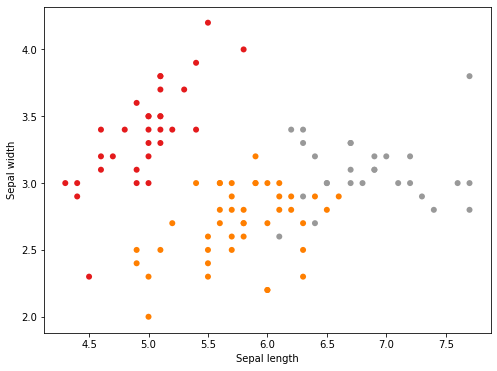

In [70]:
centroid = []
cluster, centroid = kmeans(X_train, 3, centroid)
cluster_train = cluster_to_label(cluster, y_train)

print (calculate_accuracy(cluster_train, y_train))
plot_cluster(X_train, cluster_train)

In [71]:
cluster_test, new_centroid = kmeans(X_test, 3, centroid)
cluster_test

[2,
 1,
 0,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 2,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 0,
 2,
 0]

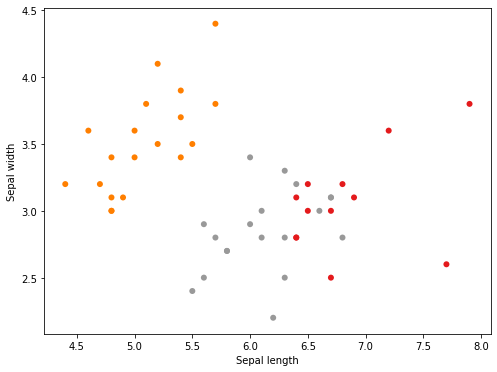

In [72]:
plot_cluster(X_test, cluster_test)

In [73]:
new_label_cluster = cluster_to_label(cluster_test, y_test)
accuracy_kmeans = calculate_accuracy(new_label_cluster, y_test)
print(accuracy_kmeans)

0.92
